# Dragon Real Estate - Price Prediction


by Dipak Patil

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression

In [2]:
path=r'housing data.csv'

In [3]:
df= pd.read_csv(path)

In [4]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df["RM"].isnull().sum()

5

In [7]:
df.fillna(df["RM"].mean(), inplace= True)

In [8]:
df["RM"].isnull().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.269758,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.662569,22.545257
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.750881,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.150308,9.192099
min,0.006320,0.000000,0.460000,0.000000,0.385000,2.000000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.100000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
%matplotlib inline

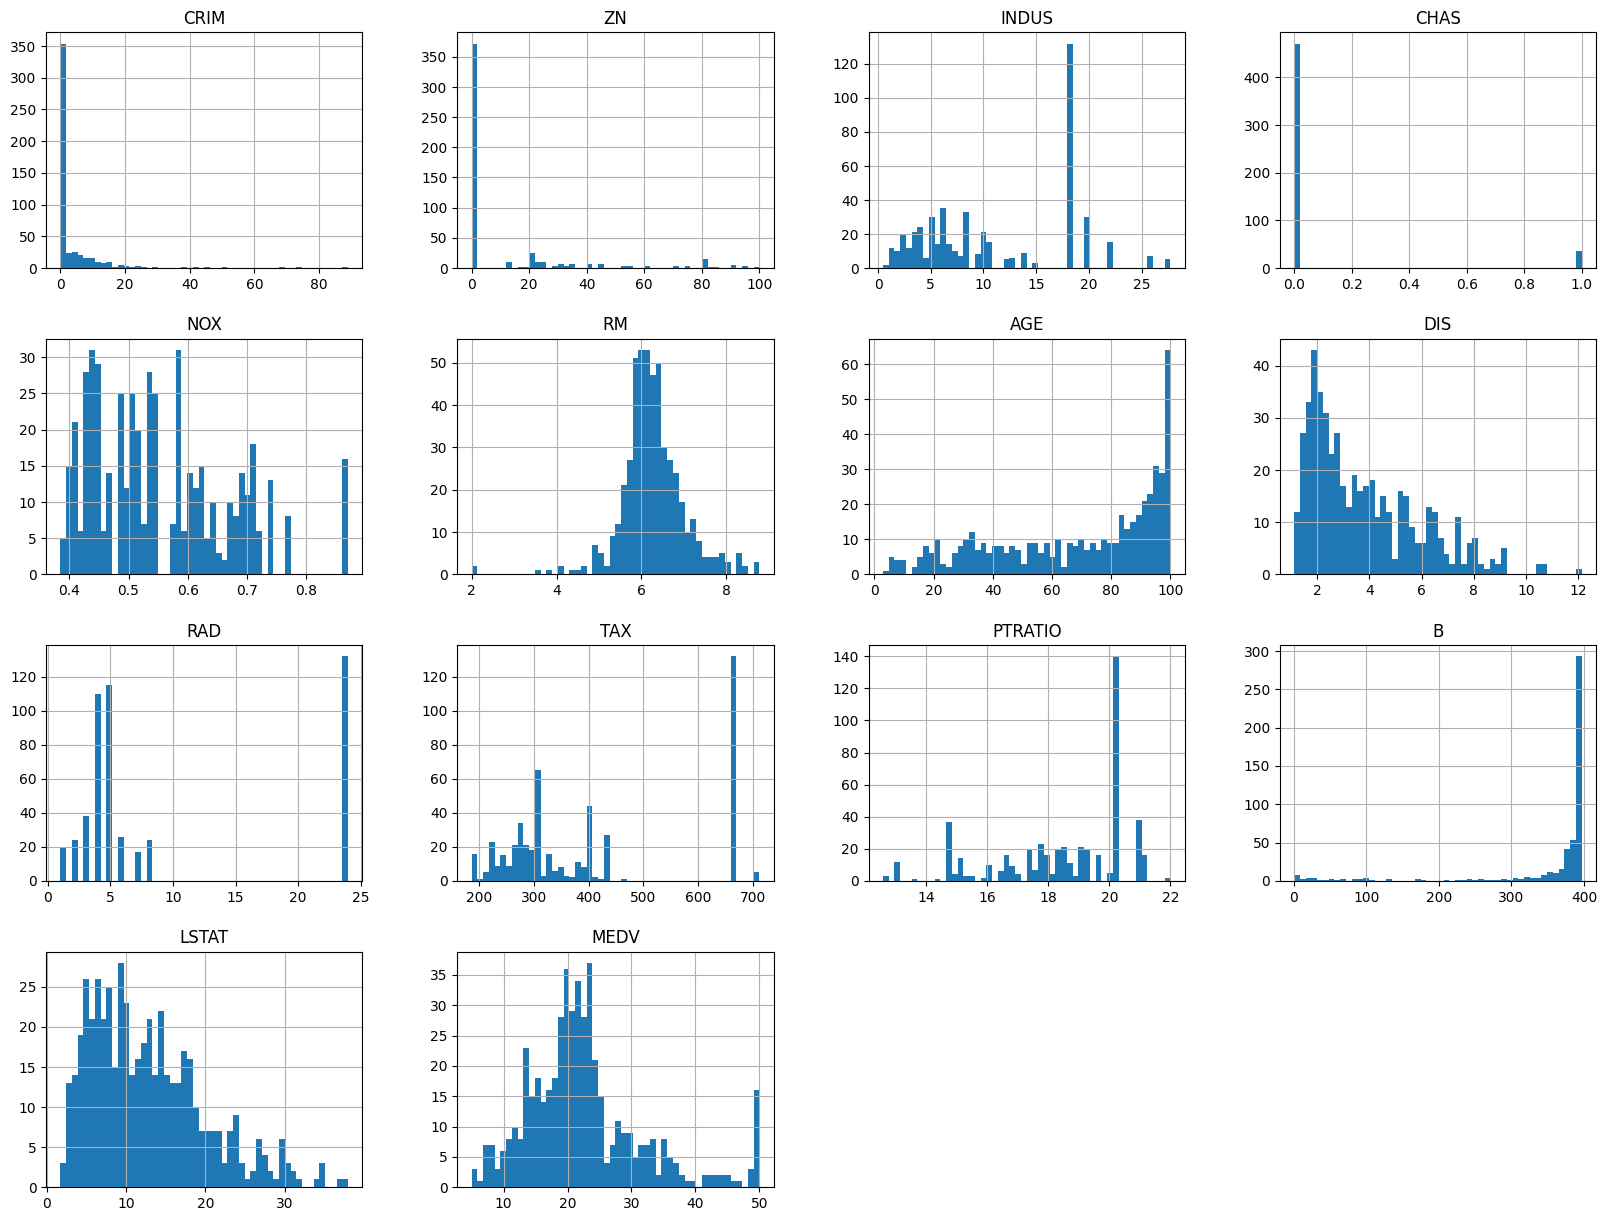

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## Train-Test Splitting

In [13]:
# for learning purpose
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)* test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
train_set,test_set = split_train_test(df,0.15)

In [15]:
#print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}")


In [16]:
#practically we should use this library
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df,test_size = 0.15, random_state=42)

In [17]:
print(f"Rows in train set : {len(train_set)}\nRows in test set : {len(test_set)}")


Rows in train set : 430
Rows in test set : 76


In [18]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         441
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       228
dtype: int64

In [19]:
df["CHAS"].head()

0    0
1    0
2    0
3    0
4    0
Name: CHAS, dtype: int64

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
splitt = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state = 42)
for train_index, test_index in splitt.split(df, df["CHAS"]):
    strat_train_set = df.loc[train_index]
    strat_test_set= df.loc[test_index]

In [21]:
strat_test_set.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
20,1.25179,0.0,8.14,0,0.538,5.570,98.1,3.7979,4,307,21.0,376.57,21.02,13.6
58,0.15445,25.0,5.13,0,0.453,6.145,29.2,7.8148,8,284,19.7,390.68,6.86,23.3


In [22]:
strat_test_set["CHAS"].value_counts()

CHAS
0    71
1     5
Name: count, dtype: int64

In [23]:
71/5

14.2

In [24]:
strat_train_set["CHAS"].value_counts()

CHAS
0    400
1     30
Name: count, dtype: int64

In [25]:
400/30

13.333333333333334

In [26]:
# ideally onwards we should work on train set only
df=strat_train_set.copy()
df.shape

(430, 14)

## Looking for Correlations

In [27]:
corr_mat = df.corr()

In [28]:
corr_mat['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.649019
B          0.356602
ZN         0.340058
DIS        0.244771
CHAS       0.190832
AGE       -0.359157
RAD       -0.378048
CRIM      -0.394176
NOX       -0.427677
TAX       -0.467104
INDUS     -0.475364
PTRATIO   -0.496835
LSTAT     -0.738875
Name: MEDV, dtype: float64

<Axes: >

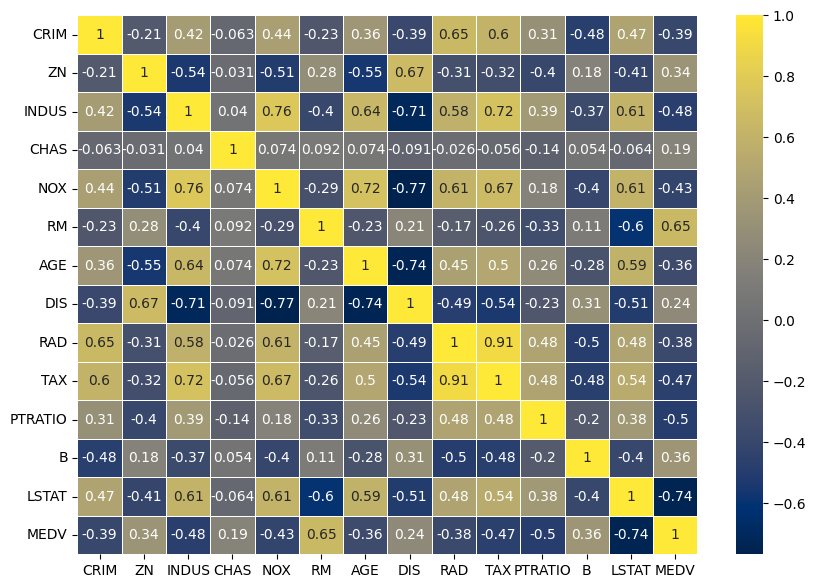

In [29]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(corr_mat, annot = True, cmap = 'cividis', linewidths = 0.5)

In [30]:
from pandas.plotting import scatter_matrix
attri = ["MEDV", "RM", "ZN", "LSTAT"]

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

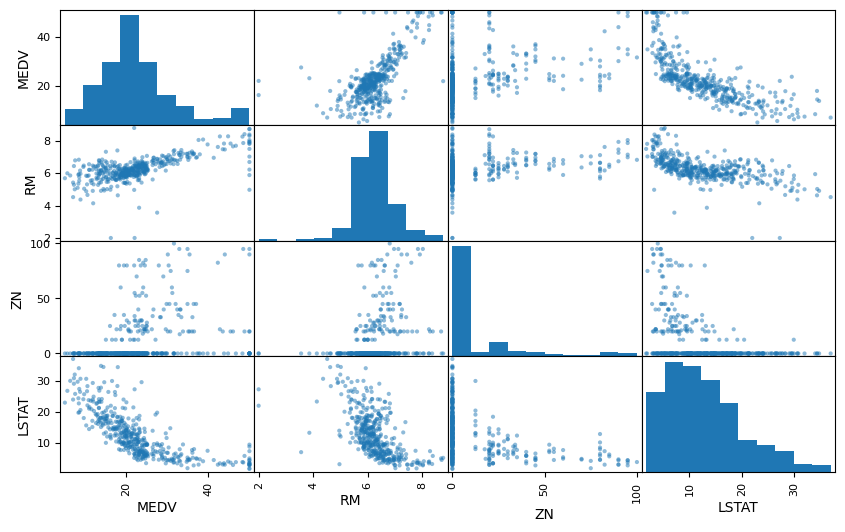

In [31]:
scatter_matrix(df[attri], figsize = (10,6))

<Axes: xlabel='RM', ylabel='MEDV'>

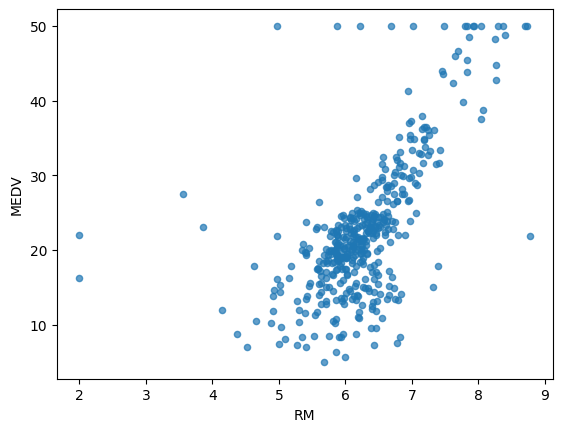

In [32]:
df.plot(kind = "scatter", x= "RM", y = "MEDV", alpha = 0.7 )

In [33]:
df = strat_train_set.drop(["MEDV"], axis = 1)
housing_labels = strat_train_set["MEDV"].copy()
df.shape

(430, 13)

In [34]:
housing_labels

127    16.2
482    25.0
151    19.6
349    26.6
286    20.1
       ... 
53     23.4
423    13.4
98     43.8
455    14.1
466    19.0
Name: MEDV, Length: 430, dtype: float64

In [35]:
# to take care of missing attributes
#1. get rid of missing data point
#2. get rid of missing attributes
#3. set the value to some value - you should use library from sklearn.preprocessing import imputer or from sklearn.impute import SimpleImputer

# while dropping axis=1 means column

In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(df)


SimpleImputer(strategy='median')

In [37]:
imputer.statistics_

array([2.74475e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21350e+00, 7.77000e+01, 3.19095e+00, 5.00000e+00, 3.34500e+02,
       1.89000e+01, 3.90945e+02, 1.14450e+01])

In [38]:
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)


In [39]:
df_imputed.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,3.487143,10.858140,11.283837,0.069767,0.555937,6.264083,68.599302,3.769823,9.651163,410.630233,18.451628,353.156581,12.773163
std,7.914511,22.450118,6.863975,0.255051,0.115707,0.768525,28.288095,2.090027,8.686682,168.739190,2.121943,96.337255,7.196651
min,0.006320,0.000000,0.740000,0.000000,0.385000,2.000000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.085013,0.000000,5.320000,0.000000,0.453000,5.878250,43.875000,2.066825,4.000000,281.750000,17.400000,373.105000,6.950000
50%,0.274475,0.000000,9.900000,0.000000,0.538000,6.213500,77.700000,3.190950,5.000000,334.500000,18.900000,390.945000,11.445000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.628000,93.975000,5.112625,24.000000,666.000000,20.200000,395.620000,17.107500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit-learn Design

## Feature scaling

## Creating Pipeline

we should do this before getting rid of missing values or filling na. here before impute operation

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline( [
    ("imputer", SimpleImputer(strategy = 'median')), #input missing values
    # you can add as many as you want 
    ("std_scaler", StandardScaler())  #standardize features
])

In [41]:
np_housing_tr = my_pipeline.fit_transform(df)  # it is numpy array

In [42]:
np_housing_tr.shape

(430, 13)

## Select and train the model for Dragon Real Estates

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = DecisionTreeRegressor()
# model = LinearRegression()
model = RandomForestRegressor()
model.fit(np_housing_tr, housing_labels)

RandomForestRegressor()

In [44]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
127,0.25915,0.0,21.89,0,0.624,2.000,96.0,1.7883,4,437,21.2,392.11,22.00
482,5.73116,0.0,18.10,0,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01
151,1.49632,0.0,19.58,0,0.871,5.404,100.0,1.5916,5,403,14.7,341.60,13.28
349,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89
286,0.01965,80.0,1.76,0,0.385,6.230,31.5,9.0892,1,241,18.2,341.60,12.93


In [45]:
some_data = df
prepared_data = my_pipeline.transform(some_data)

In [46]:
prepared_data[0]

array([-0.40833261, -0.48421961,  1.5469924 , -0.27386128,  0.58892748,
       -5.5548612 ,  0.96975828, -0.94918894, -0.65131258,  0.15645733,
        1.29672341,  0.40481527,  1.28359491])

In [47]:
some_labels = housing_labels
list(some_labels)[:5]

[16.2, 25.0, 19.6, 26.6, 20.1]

In [48]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
127,0.25915,0.0,21.89,0,0.624,2.000,96.0,1.7883,4,437,21.2,392.11,22.00
482,5.73116,0.0,18.10,0,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01
151,1.49632,0.0,19.58,0,0.871,5.404,100.0,1.5916,5,403,14.7,341.60,13.28
349,0.02899,40.0,1.25,0,0.429,6.939,34.5,8.7921,1,335,19.7,389.85,5.89
286,0.01965,80.0,1.76,0,0.385,6.230,31.5,9.0892,1,241,18.2,341.60,12.93


In [49]:
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(np_housing_tr)
mse = mean_squared_error(housing_labels, housing_prediction)
rmse = np.sqrt(mse)

In [50]:
model.predict(prepared_data)

array([15.387, 27.458, 18.906, 27.159, 21.18 , 15.447, 25.372,  9.317,
       33.497,  9.545, 21.426, 21.07 , 16.358, 27.386, 11.265,  7.131,
       18.272, 18.568, 21.863, 18.232, 35.479, 23.874, 47.619, 18.814,
       49.053, 23.844, 17.982, 33.807, 23.289, 14.997,  8.446,  9.483,
       14.581, 14.419, 23.142, 20.829, 29.718, 19.077, 34.088,  8.307,
       36.969, 44.958, 20.216, 24.663, 23.87 , 23.518, 47.471, 16.143,
       26.693, 20.542, 17.363, 24.072, 18.825, 23.632, 47.038, 18.248,
       19.978, 12.957, 22.383, 24.183, 35.394,  9.571, 19.318, 20.041,
       21.358, 29.983, 20.008, 23.132, 24.687, 25.077, 22.885, 16.262,
       15.6  , 21.347, 21.218, 38.896, 21.717, 19.965, 23.07 , 22.734,
       23.034, 24.159, 21.792, 16.226, 19.189, 28.169, 23.29 , 23.33 ,
       19.463, 26.712, 43.79 , 24.733, 25.651, 31.386, 30.558, 18.631,
       24.528, 12.332, 22.561, 19.512, 34.595, 47.844, 25.997, 17.176,
       23.294, 15.907, 32.044, 23.333, 14.624, 46.261, 24.203, 31.822,
      

In [51]:
rmse

1.25267580672103

In [52]:
# here we can see overfitting which is not practial

### Using better evaluation technique - Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score
scores =  cross_val_score( model, np_housing_tr, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)

In [54]:
rmse_scores

array([2.85156453, 2.98065813, 2.9945702 , 2.76072507, 2.90209841,
       2.62273706, 5.16576836, 2.88741438, 3.33070273, 3.63836553])

In [55]:
def print_scores(scores):
    print("scores are: ", scores)
    print("Mean: ", scores.mean())
    print("standard deviation: ", scores.std())

In [56]:
print_scores(rmse_scores)

scores are:  [2.85156453 2.98065813 2.9945702  2.76072507 2.90209841 2.62273706
 5.16576836 2.88741438 3.33070273 3.63836553]
Mean:  3.2134604389346486
standard deviation:  0.7068274586058116


## Saving the model

In [57]:
from joblib import dump, load
dump(model, "RealEstate.joblib")

['RealEstate.joblib']

## Testing the model

In [58]:
x_test = strat_test_set.drop("MEDV", axis = 1)
y_test = strat_test_set["MEDV"].copy()
x_test_prapared = my_pipeline.transform(x_test)

final_prediction = model.predict(x_test_prapared)
final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

In [59]:
print(final_prediction)
print(list(y_test))

[14.485 23.313 13.656 21.196 26.448 29.405 14.695 21.364 20.602 30.012
 19.421 22.649 32.733 26.908 20.376 14.722 19.126 45.401 18.121 23.661
 43.009 30.728 19.883 33.252 32.684 20.647 21.923 19.801 33.124 34.117
 19.245 22.1   20.839 19.742 23.225 10.894 20.089 23.674 31.737 31.188
 11.902 31.271 14.472 20.402 20.379 23.772 15.723 24.277 10.622 18.785
  6.873 21.882 27.125  9.807 23.881 21.509 18.932 11.628 18.646 34.172
 20.698 25.695 47.302 20.972 11.153 21.09  20.766 21.905 14.7   18.376
 41.65  21.619 15.225 20.373 29.193 18.194]
[13.6, 23.3, 16.7, 11.9, 27.0, 24.8, 17.8, 20.6, 19.7, 23.6, 18.9, 22.0, 33.2, 25.0, 18.7, 14.6, 17.2, 41.7, 19.5, 22.2, 43.1, 27.9, 23.8, 32.0, 34.6, 20.4, 22.2, 19.4, 33.1, 37.3, 20.8, 23.2, 21.7, 21.5, 23.6, 13.1, 21.8, 23.8, 28.5, 31.0, 13.8, 32.2, 14.1, 21.5, 20.9, 36.2, 19.4, 16.5, 12.3, 10.4, 5.0, 20.6, 28.0, 7.2, 25.0, 21.7, 14.4, 10.2, 19.6, 33.3, 21.1, 30.1, 50.0, 23.0, 12.7, 20.6, 20.3, 20.3, 13.5, 18.6, 35.2, 21.2, 15.6, 19.2, 29.1, 19.9]


In [60]:
print(final_mse)
print(final_rmse)

9.130114763157898
3.02160797641883


In [61]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
127,0.25915,0.0,21.89,0,0.624,2.000,96.0,1.7883,4,437,21.2,392.11,22.00
482,5.73116,0.0,18.10,0,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01


In [62]:
prepared_data[0]

array([-0.40833261, -0.48421961,  1.5469924 , -0.27386128,  0.58892748,
       -5.5548612 ,  0.96975828, -0.94918894, -0.65131258,  0.15645733,
        1.29672341,  0.40481527,  1.28359491])

## Using the model

In [63]:
from joblib import dump, load
model = load("RealEstate.joblib")
features = np.array([[-0.40833261, -0.48421961,  1.5469924 , -0.27386128,  0.58892748,
       -5.5548612 ,  0.96975828, -0.94918894, -0.65131258,  0.15645733,
        1.29672341,  0.40481527,  1.28359491]])

model.predict(features)

array([15.387])